# Multiple Linear Regression

In [61]:
import pandas as pd
import matplotlib as plt
import seaborn as sb

In [54]:
A = pd.read_csv("D:/Datasets/50_Startups.csv")                   # loaded data frame.

# EDA --- Exploratory Data Analysis

In [55]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [57]:
A.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [58]:
# identification of continues and categorical coloumns
cat = []
con = []

for i in A.columns:
    if (A[i].dtypes == "object"):
        con.append(i)
    else:
        cat.append(i)

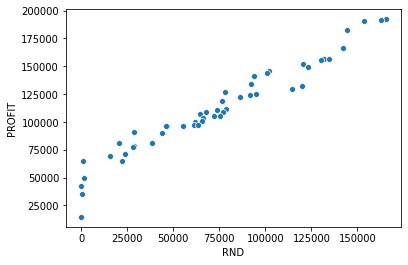

In [73]:
Y = A["PROFIT"]
X = A["RND"]
sb.scatterplot(X,Y)


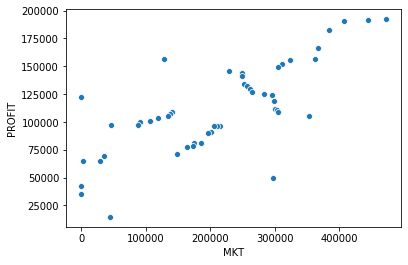

In [74]:
Y = A["PROFIT"]
X = A["MKT"]
sb.scatterplot(X,Y)

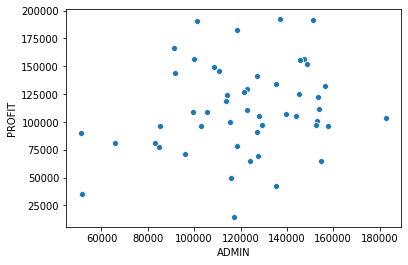

In [75]:
Y = A["PROFIT"]
X = A["ADMIN"]
sb.scatterplot(X,Y)

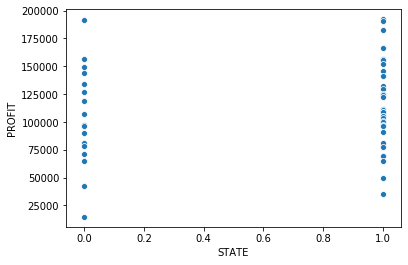

In [106]:
Y = A["PROFIT"]
X = A["STATE"]
sb.scatterplot(X,Y)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


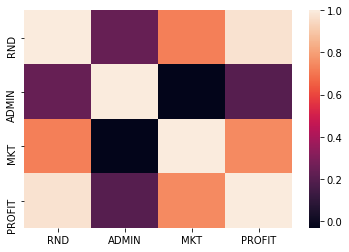

In [76]:
sb.heatmap(A.corr())
A.corr()

# Feature Engineering

In [83]:
#  We have convert now object i.e categorical variable to continews variable. by using Getdummies function.

A["STATE"] = pd.get_dummies(A["STATE"])
A["STATE"].head()

0    1
1    0
2    1
3    1
4    1
Name: STATE, dtype: uint8

# OLS Algorithm 

In [98]:
X = A[["RND"]]
Y = A[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, random_state=22)

from statsmodels.api import OLS,add_constant
mo = OLS(ytrain,add_constant(xtrain))
model = mo.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     582.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.19e-24
Time:                        11:34:42   Log-Likelihood:                -424.06
No. Observations:                  40   AIC:                             852.1
Df Residuals:                      38   BIC:                             855.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.048e+04   2948.811     17.118      0.000    4.45e+04    5.64e+04
RND            0.8321      0.034     24.135      0.000       0.762       0.902
==============================================================================
Omnibus:                       16.079   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.329
Skew:                          -1.157   Prob(JB):                     1.42e-05
Kurtosis:                       5.836   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
X = A[["RND","ADMIN"]]
Y = A[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,yest = train_test_split(X,Y,test_size=0.2,random_state=22)

from statsmodels.api import OLS,add_constant
mo = OLS(ytrain,add_constant(xtrain))
model = mo.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     289.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.56e-23
Time:                        11:34:44   Log-Likelihood:                -423.68
No. Observations:                  40   AIC:                             853.4
Df Residuals:                      37   BIC:                             858.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.541e+04   6587.890      8.411      0.000    4.21e+04    6.88e+04
RND            0.8394      0.036     23.519      0.000       0.767       0.912
ADMIN         -0.0457      0.055     -0.839      0.407      -0.156       0.065
==============================================================================
Omnibus:                       16.673   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.412
Skew:                          -1.199   Prob(JB):                     8.25e-06
Kurtosis:                       5.881   Cond. No.                     6.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
X = A[["RND","ADMIN","MKT"]]
Y = A[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytain,ytest = train_test_split(X,Y,test_size=0.2,random_state=22)

from statsmodels.api import OLS,add_constant
mo = OLS(ytrain,add_constant(xtrain))
model = mo.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.26e-22
Time:                        11:55:55   Log-Likelihood:                -422.81
No. Observations:                  40   AIC:                             853.6
Df Residuals:                      36   BIC:                             860.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.098e+04   7408.762      6.882      0.000     3.6e+04     6.6e+04
RND            0.7928      0.051     15.542      0.000       0.689       0.896
ADMIN         -0.0247      0.057     -0.436      0.665      -0.139       0.090
MKT            0.0247      0.019      1.269      0.213      -0.015       0.064
==============================================================================
Omnibus:                       15.296   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.527
Skew:                          -1.117   Prob(JB):                     3.49e-05
Kurtosis:                       5.707   Cond. No.                     1.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
# As per the above model summary the admin p-value has been excceding the ideal vale we have to dicard it from model.

# Ideal Value for P-Value is:- 0.05 indicates a 5% risk

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/875/1*13m_eIODa1oUXK743FKRGA.png")

In [105]:
X = A[["RND","MKT","STATE"]]
Y = A["PROFIT"]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=22)

from statsmodels.api import OLS,add_constant
mo = OLS(ytain,add_constant(xtrain))
model = mo.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     195.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.49e-22
Time:                        12:06:50   Log-Likelihood:                -422.91
No. Observations:                  40   AIC:                             853.8
Df Residuals:                      36   BIC:                             860.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.812e+04   3833.943     12.551      0.000    4.03e+04    5.59e+04
RND            0.7845      0.048     16.482      0.000       0.688       0.881
MKT            0.0272      0.019      1.456      0.154      -0.011       0.065
STATE        -28.3669   3406.706     -0.008      0.993   -6937.487    6880.753
==============================================================================
Omnibus:                       15.161   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.373
Skew:                          -1.104   Prob(JB):                     3.77e-05
Kurtosis:                       5.711   Cond. No.                     7.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# As per the above model summary the STATE p-value has been excceding the ideal vale we have to dicard it from model.


# Final Model

In [108]:
X=A[["RND","MKT"]]
Y=A[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=22)

from statsmodels.api import OLS,add_constant
mo =OLS(ytrain,add_constant(xtrain))
model = mo.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     301.4
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.26e-23
Time:                        12:13:03   Log-Likelihood:                -422.91
No. Observations:                  40   AIC:                             851.8
Df Residuals:                      37   BIC:                             856.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.81e+04   3318.799     14.494      0.000    4.14e+04    5.48e+04
RND            0.7845      0.047     16.761      0.000       0.690       0.879
MKT            0.0272      0.018      1.477      0.148      -0.010       0.065
==============================================================================
Omnibus:                       15.134   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.293
Skew:                          -1.103   Prob(JB):                     3.92e-05
Kurtosis:                       5.703   Cond. No.                     5.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
X=A[["RND","MKT"]]
Y=A[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=22)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
Y_Pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
print("MAE : ",mean_absolute_error(ytest,Y_Pred))
print("MSE : ",mean_squared_error(ytest,Y_Pred))
print("MAE : ",explained_variance_score(ytest,Y_Pred))
print("Rsqure : ",r2_score(ytest,Y_Pred))

MAE :  5083.488731118721
MSE :  41052137.78547955
MAE :  0.9780355837634558
Rsqure :  0.9764404302143168


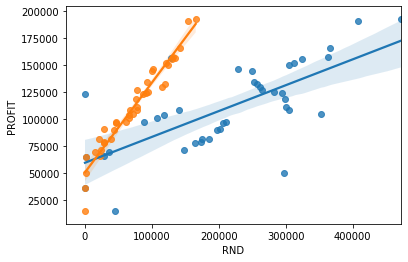

In [162]:
sb.regplot(xtrain["MKT"],ytrain)
sb.regplot(xtrain["RND"],ytrain)


# Final Summary 

In [109]:
data = [['RND', 0 , 0.939 ,0.937],['RND ~ ADMIN', 'Admin ~ 0.407', 0.940 ,0.937],['RND ~ ADMIN ~ MKT','ADMIN ~ 0.665 | MKT ~ 0.213',0.942,0.938],['RND ~ MKT ~ STATE','STATE ~ 0.993 | MKT ~ 0.154',0.942,0.937],['RND ~ MKT','MKT ~ 0.148',0.942,0.939]]
df = pd.DataFrame(data,columns=['variables',"P-value","Rsqure-value","Adj.Rsqured-value"])
df

,variables,P-value,Rsqure-value,Adj.Rsqured-value
0,RND,0,0.939,0.937
1,RND ~ ADMIN,Admin ~ 0.407,0.940,0.937
2,RND ~ ADMIN ~ MKT,ADMIN ~ 0.665 | MKT ~ 0.213,0.942,0.938
3,RND ~ MKT ~ STATE,STATE ~ 0.993 | MKT ~ 0.154,0.942,0.937
4,RND ~ MKT,MKT ~ 0.148,0.942,0.939


In [ ]:
'''So according to our final model we can say that the RAN is the best predictor 
   and the MKT is 2nd best predictor to predict the profit

'''